This script contains all the necessary code to develop, train, and evaluate a handwritten digit classifier using CNN on the MNIST dataset.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define CNN Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val))

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/100
844/844 [==============================] - 49s 56ms/step - loss: 0.1815 - accuracy: 0.9446 - val_loss: 0.0616 - val_accuracy: 0.9820
Epoch 2/100
844/844 [==============================] - 51s 61ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 3/100
844/844 [==============================] - 45s 53ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9895
Epoch 4/100
844/844 [==============================] - 46s 55ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 5/100
844/844 [==============================] - 46s 55ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0296 - val_accuracy: 0.9913
Epoch 6/100
844/844 [==============================] - 46s 55ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0271 - val_accuracy: 0.9920
Epoch 7/100
844/844 [==============================] - 45s 53ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0350 - val_ac

This code extends the baseline model by incorporating dropout, batch normalization, and data augmentation techniques. It then trains the finalized model on the entire training dataset and evaluates its performance on the test dataset. Finally, it prints the test accuracy and other performance metrics.

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Define Finalized CNN Architecture
final_model = Sequential()
final_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.25))

final_model.add(Conv2D(64, (3, 3), activation='relu'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Dropout(0.25))

final_model.add(Conv2D(64, (3, 3), activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Flatten())
final_model.add(Dropout(0.5))

final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

# Compile the Final Model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(x_train)

# Train the Final Model
final_history = final_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_val, y_val))

# Evaluate the Final Model on Test Data
final_scores = final_model.evaluate(x_test, y_test, verbose=0)

print("Test Accuracy:", final_scores[1])

# Predict probabilities for test data
y_pred_proba = final_model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

final_model.save('/content/final_model.h5')


Epoch 1/100
844/844 [==============================] - 87s 99ms/step - loss: 0.4905 - accuracy: 0.8436 - val_loss: 0.0643 - val_accuracy: 0.9798
Epoch 2/100
844/844 [==============================] - 82s 97ms/step - loss: 0.1716 - accuracy: 0.9463 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 3/100
844/844 [==============================] - 81s 96ms/step - loss: 0.1343 - accuracy: 0.9581 - val_loss: 0.0712 - val_accuracy: 0.9790
Epoch 4/100
844/844 [==============================] - 85s 101ms/step - loss: 0.1129 - accuracy: 0.9655 - val_loss: 0.0387 - val_accuracy: 0.9863
Epoch 5/100
844/844 [==============================] - 82s 98ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 6/100
844/844 [==============================] - 83s 98ms/step - loss: 0.0896 - accuracy: 0.9721 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 7/100
844/844 [==============================] - 85s 101ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0283 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The code below evaluates the performance of the final model on classifying unseen data.

1/1 [==============================] - 0s 132ms/step
Predicted class: 3


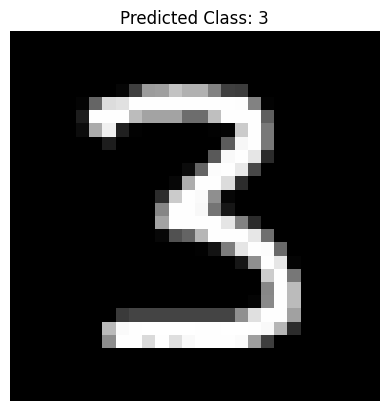

In [8]:
from keras.preprocessing import image
from tensorflow import keras

# Preprocess the new images
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to the new image
image_path = "/content/three.png"

# Preprocess the image
new_image = preprocess_image(image_path)

# Load the finalized model
final_model = keras.models.load_model('/content/final_model.h5')

# Make predictions
predictions = final_model.predict(new_image)
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)

# Optionally, you can visualize the prediction
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title("Predicted Class: " + str(predicted_class))
plt.axis('off')
plt.show()


The final model successfully predicts the class of the handwritten digit.